# Analyse der Code Metriken

## Importieren der CSV

In [4]:
import pandas as pd

fileNames = [
    'CodeMetriken_Backend_Sprint_3.csv', # 0 
    'CodeMetriken_Backend_Sprint_4.csv', # 1 
    'CodeMetriken_Backend_Sprint_5.csv', # 2
    'CodeMetriken_Backend_Sprint_6.csv', # 3
    'CodeMetriken_Backend_Sprint_7.csv', # 4
    'CodeMetriken_Backend_Sprint_8.csv', # 5
    'CodeMetriken_Backend_Sprint_9.csv', # 6
    ]

dataframes = []

for file in fileNames:
    dataframes.append(pd.read_csv(file, sep=';'))

# Rename the columns of all DataFrames
for i in range(len(dataframes)):
    dataframes[i] = dataframes[i].rename(columns={
        'Bereich': 'Area', 
        'Projekt': 'Project', 
        'Namespace': 'Namespace', 
        'Typ': 'Type', 
        'Member': 'Member', 
        'Wartbarkeitsindex': 'Maintainability Index', 
        'Zyklomatische Komplexität': 'Cyclomatic Complexity',
        'Vererbungstiefe': 'Inheritance Depth',
        'Klassenkopplung': 'Class Coupling',
        'Zeilen von Quellcode': 'Lines of Code',
        'Zeilen von ausführbarem Code': 'Lines of Executable Code'})

# Print row-count of all DataFrames
for i in range(len(dataframes)):
    print(fileNames[i] + ' row-count: ' + str(len(dataframes[i])))

CodeMetriken_Backend_Sprint_3.csv row-count: 387
CodeMetriken_Backend_Sprint_4.csv row-count: 416
CodeMetriken_Backend_Sprint_5.csv row-count: 445
CodeMetriken_Backend_Sprint_6.csv row-count: 450
CodeMetriken_Backend_Sprint_7.csv row-count: 558
CodeMetriken_Backend_Sprint_8.csv row-count: 585
CodeMetriken_Backend_Sprint_9.csv row-count: 598


## Filtern der Metrik-Tabelle erstellt von Visual Studio

In [5]:
def calcForMethods(df):
    # Excluding
    df = df[~df['Namespace'].str.contains('Backend.Data.SpeechmaticsMessages')]
    df = df[~df['Namespace'].str.contains('System.Text.RegularExpressions.Generated')]
    df = df[df['Lines of Executable Code'] != 0] # no interfaces

    # Including
    df = df[df['Area'].str.contains('Member')]
    df = df[df['Member'].str.contains('\(')] # only methods

    return df

def calcForClasses(df):
    # Excluding
    df = df[~df['Namespace'].str.contains('Backend.Data.SpeechmaticsMessages')]
    df = df[~df['Namespace'].str.contains('System.Text.RegularExpressions.Generated')]
    df = df[df['Lines of Executable Code'] != 0] # no interfaces

    # Including
    df = df[df['Area'].str.contains('Typ')] # only classes
    
    return df

# Filter each dataframe for classes and methods in new dataframes-lists

df_class = []
df_method = []

for i in range(len(dataframes)):
    df_class.append(calcForClasses(dataframes[i]))
    df_method.append(calcForMethods(dataframes[i]))

# Print row-count of all DataFrames (classes and methods)
for i in range(len(df_class)):
    print(fileNames[i] + ' row-count (classes): ' + str(len(df_class[i])))
print('------')
for i in range(len(df_class)):
    print(fileNames[i] + ' row-count (methods): ' + str(len(df_method[i])))

CodeMetriken_Backend_Sprint_3.csv row-count (classes): 15
CodeMetriken_Backend_Sprint_4.csv row-count (classes): 18
CodeMetriken_Backend_Sprint_5.csv row-count (classes): 22
CodeMetriken_Backend_Sprint_6.csv row-count (classes): 21
CodeMetriken_Backend_Sprint_7.csv row-count (classes): 25
CodeMetriken_Backend_Sprint_8.csv row-count (classes): 25
CodeMetriken_Backend_Sprint_9.csv row-count (classes): 25
------
CodeMetriken_Backend_Sprint_3.csv row-count (methods): 49
CodeMetriken_Backend_Sprint_4.csv row-count (methods): 56
CodeMetriken_Backend_Sprint_5.csv row-count (methods): 63
CodeMetriken_Backend_Sprint_6.csv row-count (methods): 63
CodeMetriken_Backend_Sprint_7.csv row-count (methods): 99
CodeMetriken_Backend_Sprint_8.csv row-count (methods): 109
CodeMetriken_Backend_Sprint_9.csv row-count (methods): 111


<>:9: SyntaxWarning: invalid escape sequence '\('
<>:9: SyntaxWarning: invalid escape sequence '\('
C:\Users\bened\AppData\Local\Temp\ipykernel_7712\956724353.py:9: SyntaxWarning: invalid escape sequence '\('
  df = df[df['Member'].str.contains('\(')] # only methods


[49, 56, 63, 63, 99, 109, 111]
[15, 18, 22, 21, 25, 25, 25]
[3, 4, 5, 6, 7, 8, 9]


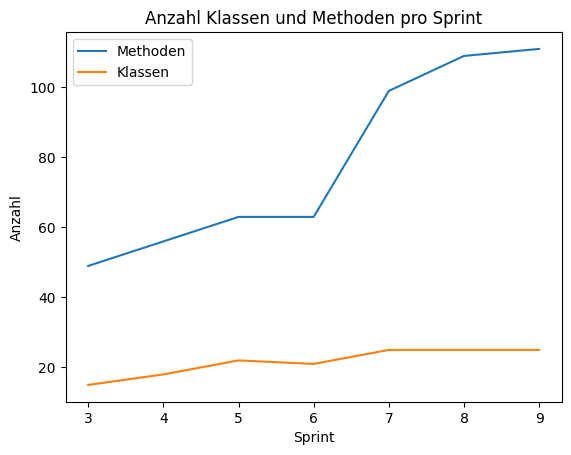

In [6]:
import matplotlib.pyplot as plt

method_row_counts = []
for ds in df_method:
    method_row_counts.append(len(ds))
print(method_row_counts)

class_row_counts = []
for ds in df_class:
    class_row_counts.append(len(ds))
print(class_row_counts)

x = []
for i in range(len(method_row_counts)):
    x.append(i+3)
print(x)

plt.plot(x, method_row_counts, label="Methoden")
plt.plot(x, class_row_counts, label="Klassen")
plt.xlabel('Sprint')
plt.ylabel('Anzahl')
plt.legend()
plt.title('Anzahl Klassen und Methoden pro Sprint')
plt.savefig('../img/plots/method_class_count.svg', format='svg')
plt.show()

## Berechnen der Metriken

In [7]:
metricsColumns = ['Maintainability Index', 'Cyclomatic Complexity', 'Lines of Executable Code']

def methodMetrics(df):
    for col in metricsColumns:
        avg = df[col].mean()
        min = df[col].min()
        max = df[col].max()
        print('{:<25} {:.2f} {:>5} {:>5}'.format(col, avg, min, max))
    return col, avg, min, max

def classMetrics(df):
    avg = df['Class Coupling'].mean()
    min = df['Class Coupling'].min()
    max = df['Class Coupling'].max()
    print('{:<25} {:.2f} {:>4} {:>5}'.format('Class Coupling', avg, min, max))
    return avg, min, max

def plotMetricsForSprint(sprint, df_method, df_class):
    print('Sprint ' + str(sprint))
    print('Metric                    Average  Min  Max')
    print('-------------------------------------------')
    method_results = methodMetrics(df_method)
    print('-------------------------------------------')
    class_results = classMetrics(df_class)
    print('')
    return method_results, class_results

sprintMetrics_method = []
sprintMetics_class = []

# i = 5
# method_results, class_results = plotMetricsForSprint(i+3, df_method[-1], df_class[-1])
# sprintMetrics_method.append(method_results)
# sprintMetics_class.append(class_results)

for i in range(len(dataframes)):
    method_results, class_results = plotMetricsForSprint(i+3, df_method[i], df_class[i])
    sprintMetrics_method.append(method_results)
    sprintMetics_class.append(class_results)

Sprint 3
Metric                    Average  Min  Max
-------------------------------------------
Maintainability Index     75.04    43   100
Cyclomatic Complexity     2.35     1    13
Lines of Executable Code  6.73     1    39
-------------------------------------------
Class Coupling            14.53    0    76

Sprint 4
Metric                    Average  Min  Max
-------------------------------------------
Maintainability Index     75.59    43   100
Cyclomatic Complexity     2.21     1    13
Lines of Executable Code  6.62     1    39
-------------------------------------------
Class Coupling            14.61    0    66

Sprint 5
Metric                    Average  Min  Max
-------------------------------------------
Maintainability Index     76.33    43   100
Cyclomatic Complexity     2.27     1    13
Lines of Executable Code  6.40     1    39
-------------------------------------------
Class Coupling            13.32    0    66

Sprint 6
Metric                    Average  Min  Max
--

[3, 4, 5, 6, 7, 8, 9]


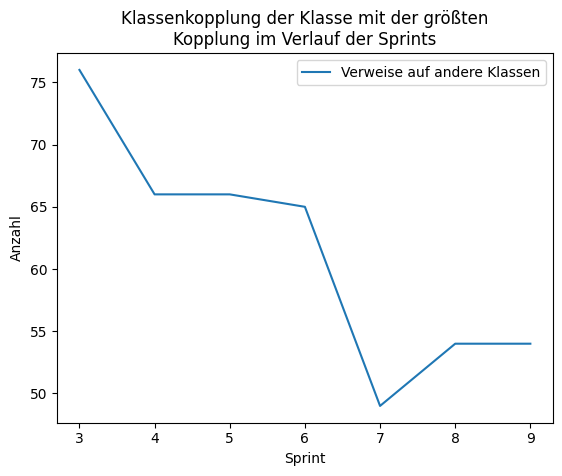

In [10]:
class_coupling_count = [76, 66, 66, 65, 49, 54, 54]

x = []
for i in range(len(method_row_counts)):
    x.append(i+3)
print(x)

plt.plot(x, class_coupling_count, label="Verweise auf andere Klassen")
plt.xlabel('Sprint')
plt.ylabel('Anzahl')
plt.legend()
plt.title('Klassenkopplung der Klasse mit der größten\nKopplung im Verlauf der Sprints')
plt.savefig('../img/plots/class_coupling.svg', format='svg')
plt.show()

## Histogramme

### Klassen-Kopplung

<Axes: ylabel='Frequency'>

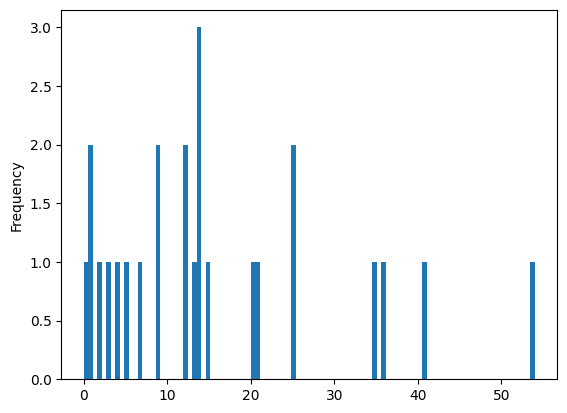

In [ ]:
df_class[-1]['Class Coupling'].plot(kind='hist', bins=100)

### Wartbarkeitsindex

<Axes: ylabel='Frequency'>

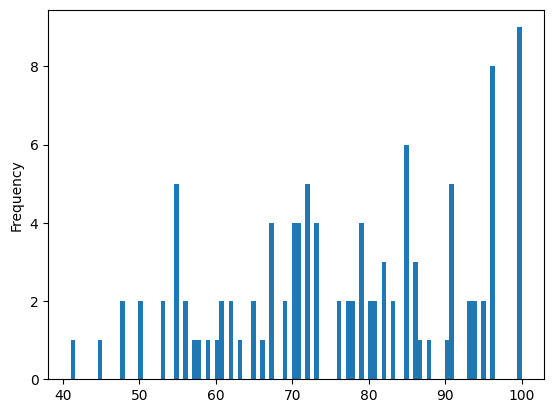

In [ ]:
df_method[-1]['Maintainability Index'].plot(kind='hist', bins=100)

### Zyklomatische Komplexität

<Axes: ylabel='Frequency'>

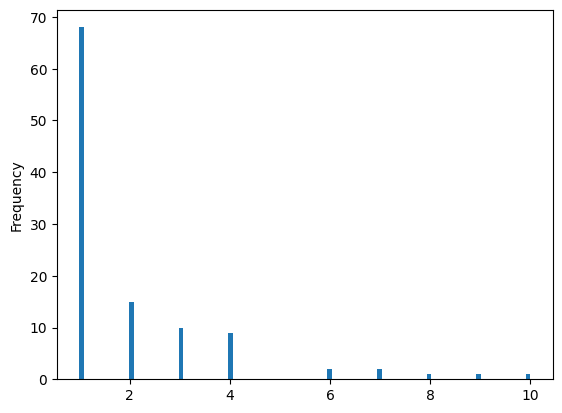

In [ ]:
df_method[-1]['Cyclomatic Complexity'].plot(kind='hist', bins=100)

### Codezeilen pro Methode

<Axes: ylabel='Frequency'>

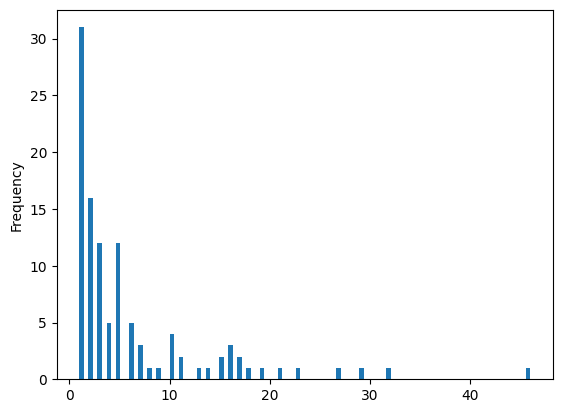

In [ ]:
df_method[-1]['Lines of Executable Code'].plot(kind='hist', bins=100)